<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina - Projeto Parceria

Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno: Raul Pichinin

# **Tópicos**

<ol type="1">
  <li>Projeto;</li>
  <li>Extração dos Dados;</li>
  <li>Análise exploratória;</li>
  <li>Avaliação dos Modelos;</li>
  <li>Visualização.</li>
</ol>

---

## 1\. Projeto Previsão de Vendas

Empresas que investem em anúncios nas principais mídias tradicionais (TV, Rádio e Jornal) buscam prever suas vendas com base nos históricos anteriores.
Para isso, necessitam de uma proposta de analise de dados que solucione e traga resultados aceitavéis para os próximos investimentos.




### **1.1. Objetivo**

O objetivo deste estudo é criar modelos estatísticos que possam prever valores de vendas a partir do histórico das vendas já realizadas e dos
investimento em marketing.

## 2\. Extração dos Dados

### **2.1. Importação**

In [20]:
import pandas as pd

dados_df = pd.read_csv('advertising.csv')
display(dados_df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### **2.2. Limpeza**

In [19]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 3\. Análise Exploratória

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

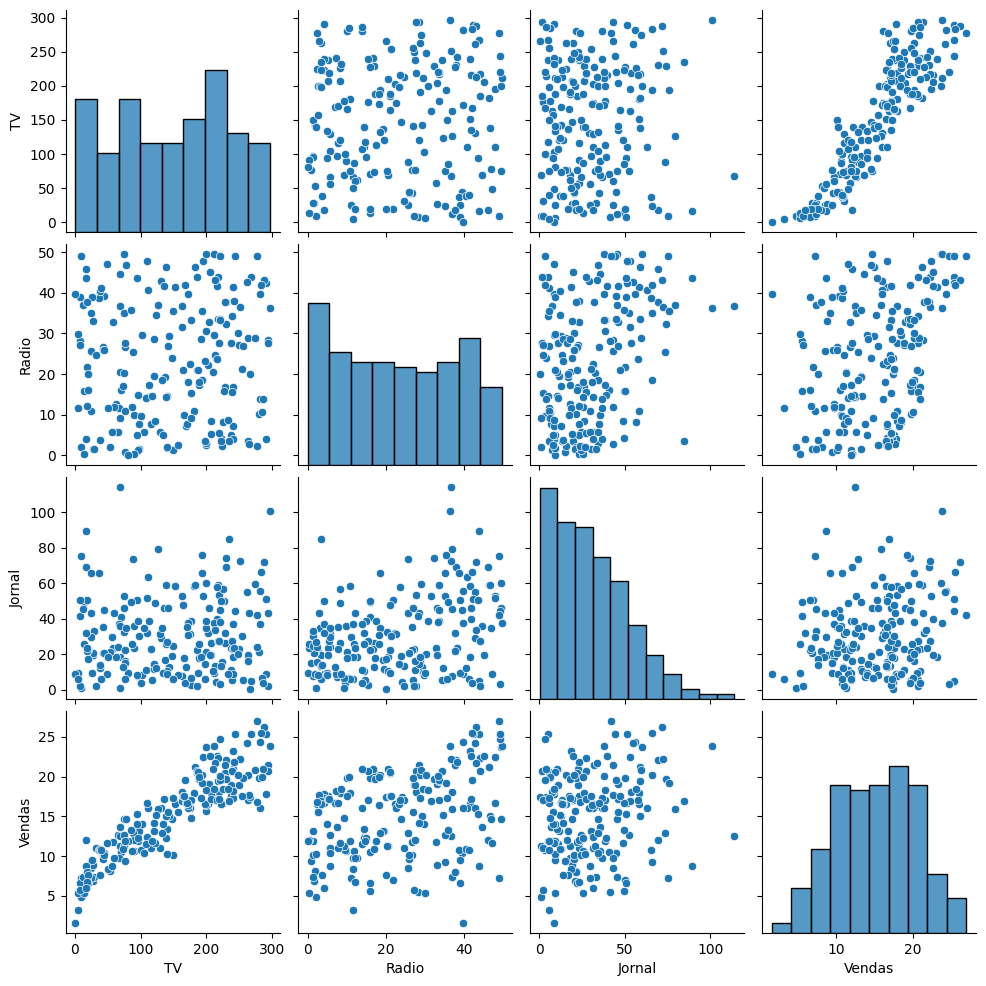

In [23]:
# Gerando um gráfico que mostra a correlação todas as variáveis do conjunto de dados.
sns.pairplot(dados_df)
plt.show()

  **Comentário**

 - No gráfico TV X Vendas, podemos perceber que
existe uma proporcionalidade no investimento e no aumento das vendas.

- Já no gráfico Rádio X Vendas essa
proporcionalidade não é clara. Assim como no gráfico Jornal x Vendas.
 Ou seja, as vendas tendem a existir com alto ou baixo investimento nos anúncios.

In [27]:
display(dados_df.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


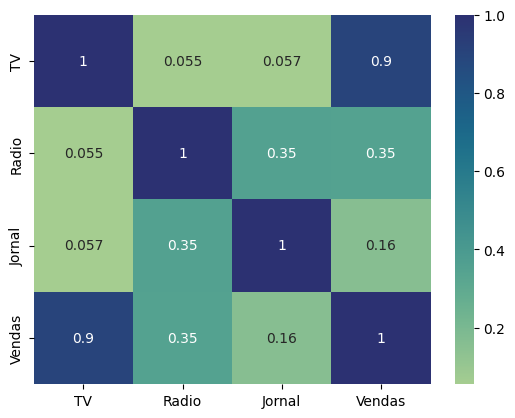

In [29]:
## Gerando outra visualização com método mapa de calor/ heatmap.
sns.heatmap(dados_df.corr(), cmap='crest', annot=True)
plt.show()

 **Comentário**

 - No gráfico TV X Vendas tem 0.9 (quase valor máximo), Radio x Vendas 0.35 e Jornal x Vendas 0.16 confirmando a análise do gráfico anterior.

### **3.1. Modelagem / Treino e Algoritmo**

Nossos inputs são os valores do investimento nos
diferentes meios de comunicação. Nosso output será as vendas previstas
dado as entradas informadas.
Podemos agora partir para a preparação dos dados para treinarmos o Modelo de Machine Learning.

In [68]:
# predictors / Input -> valores do investimento nos diferentes meios de comunicação - Rádio, TV e Jornal
# target / Output -> Vendas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

predictors_train, predictors_test, target_train, target_test = train_test_split(
    dados_df.drop(['Vendas'], axis=1),
    dados_df['Vendas'],
    test_size=1/3,
    random_state=1
)

### **3.2. Avaliação dos Modelos**

Usaremos dois métodos distintos de regressão são eles: **Regressão** e
**RandomForest (Árvore de Decisão)**
Junto com o **numpy**, uma biblioteca muito utilizada para grandes volumes de cálculos matemáticos e estatísticos.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

model_reg = LinearRegression()

model_reg = model_reg.fit(predictors_train, target_train)
model_reg.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TV', 'Radio', 'Jornal'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.0548235 ,  0.10798614, -0.00255874]),
 'rank_': 3,
 'singular_': array([983.55661567, 258.96501257, 152.06406454]),
 'intercept_': 4.65043166919995}

In [71]:
from sklearn.ensemble import RandomForestRegressor

model_arv = RandomForestRegressor()

model_arv = model_arv.fit(predictors_train, target_train)
model_arv.__dict__

{'estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['TV', 'Radio', 'Jornal'], dtype=object),
 'n_features_in_': 3,
 'n_outputs_': 1,
 'estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features=1.0, random_state=1688384485),
  DecisionTreeRegressor(max_features=1.0, random_state=

Utilizaremos métodos RSME e R²  para avaliar os treinos de IA
 Lembrando que os valore vão variar de 0 á 1.

In [82]:
# RMSE da REGRESSÃO
from sklearn.metrics import mean_squared_error

target_predicted = model_reg.predict(predictors_test)

rmse_reg= np.sqrt(mean_squared_error(target_test, target_predicted))


In [83]:
# RMSE da ÁRVORE
target_predicted = model_arv.predict(predictors_test)

rmse_arv= np.sqrt(mean_squared_error(target_test, target_predicted))


In [85]:
# R² da REGRESSÃO
r2_reg = r2_score(target_test, model_reg.predict(predictors_test))

In [87]:
# R² da ÁRVORE
r2_arv = r2_score(target_test, model_arv.predict(predictors_test))

In [91]:
print(f'RMSE da Regressão Linear: {rmse_reg}')
print("R² da Regressão Linear:", r2_reg)
print(f'RMSE da Árvore de Decisão: {rmse_arv}')
print("R² da Árvore de Decisão:", r2_arv)


RMSE da Regressão Linear: 1.6251297054442895
R² da Regressão Linear: 0.9040193073964761
RMSE da Árvore de Decisão: 0.9650424861113638
R² da Árvore de Decisão: 0.9661545190998668


**R²** se mostrou mais confiavél com valores de 0.90 na Regressão e 0.97 na Árvore de decisão.

### **4. Visualização**

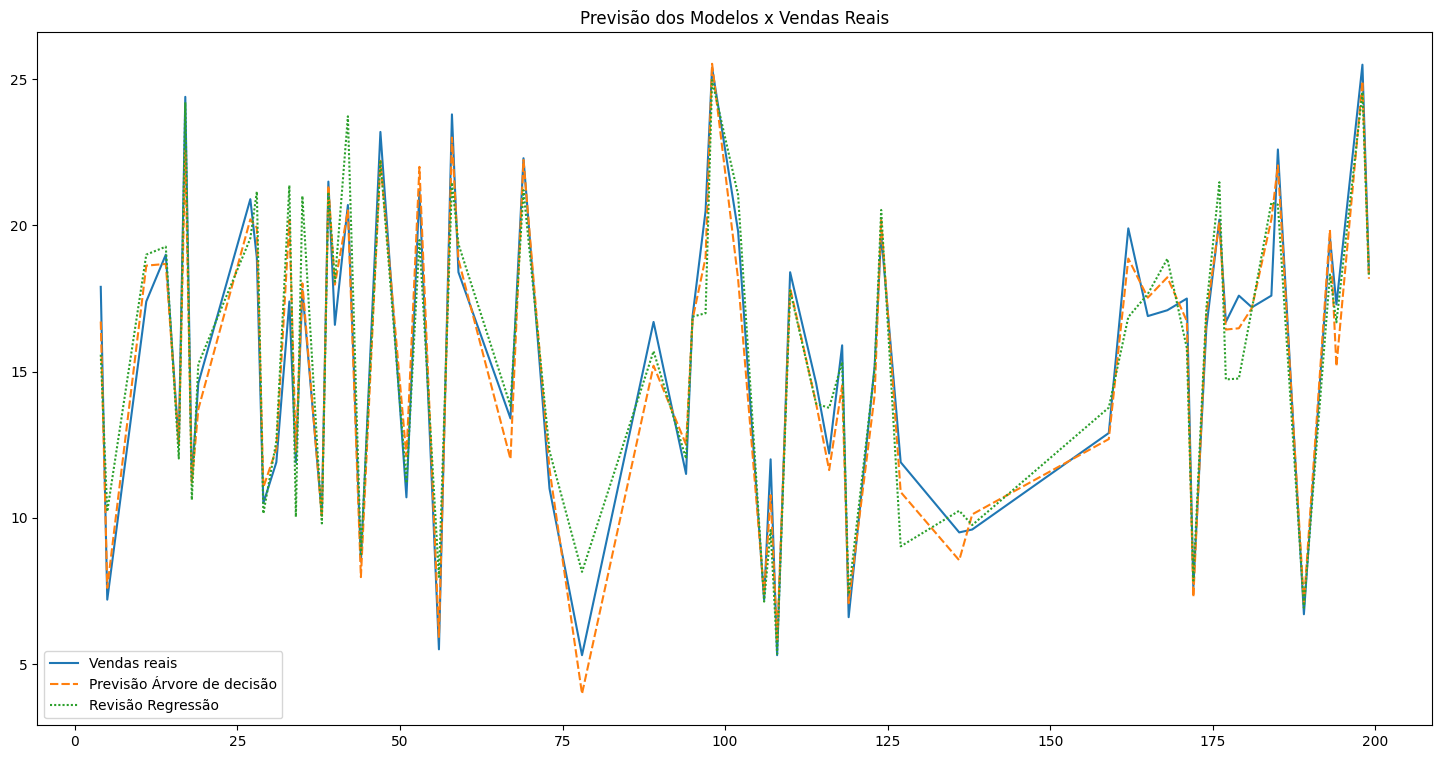

In [101]:
df_resultado = pd.DataFrame()
df_resultado['Vendas reais'] = target_test
df_resultado['Previsão Árvore de decisão'] = model_arv.predict(predictors_test)
df_resultado['Revisão Regressão'] = model_reg.predict(predictors_test)


plt.figure(figsize=(18, 9))
sns.lineplot(data=df_resultado)
plt.title('Previsão dos Modelos x Vendas Reais')
plt.show()
display()

  **Comentário**

O gráfico mostra todos os **60*** pontos de teste que são dados reais (linha azul) extraídos da nossa base ao lado as duas curvas geradas pelos modelos estatísticos.
A linha tracejada Laranja representa os dados de previsão calculados pelo modelo de Àrvore de decisão.
A linha Verde tracejada representa os dados de previsão calculados pelo modelo de Regressão Linear.




*A base de dados têm 200 pontos foi definido 30% para teste, logo 0,3X200 = 60 pontos.*

Na fase exploratória inicial percebemos que o investimento em TV era o que possuía maior correlação com as vendas.
Aqui faremos uma projeção no modelo de Árvore de decisão.


In [103]:
importancia = pd.DataFrame({'Atributos': predictors_train.columns, 'Importância': model_arv.feature_importances_})
display(importancia)

,Atributos,Importância
0,TV,0.843844
1,Radio,0.137460
2,Jornal,0.018696


<ipython-input-117-e408bbda08a0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Importância', x='Atributos', data=importancia, palette='viridis')


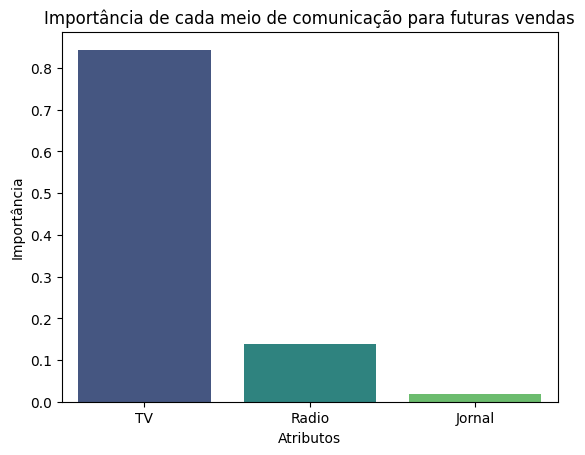

<Figure size 1000x600 with 0 Axes>

In [117]:
sns.barplot(y='Importância', x='Atributos', data=importancia, palette='viridis')
plt.title('Importância de cada meio de comunicação para futuras vendas')
plt.figure(figsize=(10, 6))

plt.show()

 **Conclusão**

Em mais um gráfico vemos a importância do meio de comunicação: TV  chegando á 85% de relevância.
Rádio apresenta 13% seguido de Jornal com 2%.